# SI 618: Data Manipulation and Analysis
## 05 - Applied Statistics I

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2023.09.27.1.CT

## Correlation and Regression
### Wine quality

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1: List the 5 largest correlations in the wine quality dataset

Feeling ambitious?  Try to get the following output:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>var1</th>
      <th>var2</th>
      <th>corr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>fixed acidity</td>
      <td>pH</td>
      <td>-0.682978</td>
    </tr>
    <tr>
      <th>14</th>
      <td>citric acid</td>
      <td>fixed acidity</td>
      <td>0.671703</td>
    </tr>
    <tr>
      <th>16</th>
      <td>density</td>
      <td>fixed acidity</td>
      <td>0.668047</td>
    </tr>
    <tr>
      <th>18</th>
      <td>free sulfur dioxide</td>
      <td>total sulfur dioxide</td>
      <td>0.667666</td>
    </tr>
    <tr>
      <th>20</th>
      <td>citric acid</td>
      <td>volatile acidity</td>
      <td>-0.552496</td>
    </tr>
  </tbody>
</table>

In [ ]:
wine.corr() #Shows all corellations between all variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# Anything correlated to itself is 1
# Symmetric matrix so value scan be repeated.
# My solution:

winecor = wine.corr().stack()
winecor = winecor.sort_values(ascending=False)
winecor = winecor[winecor < 1] # Risky due to chance something is correlated with something besides itself.
winecor

citric acid          fixed acidity           0.671703
fixed acidity        citric acid             0.671703
                     density                 0.668047
density              fixed acidity           0.668047
free sulfur dioxide  total sulfur dioxide    0.667666
                                               ...   
pH                   citric acid            -0.541904
citric acid          volatile acidity       -0.552496
volatile acidity     citric acid            -0.552496
fixed acidity        pH                     -0.682978
pH                   fixed acidity          -0.682978
Length: 132, dtype: float64

In [ ]:
#Class solution:
t = wine.corr()
t = t.stack().reset_index()
t.columns = ['var1','var2','corr']
t = t[t['var1'] != t['var2']]
t = t.sort_values('corr', ascending=False, key=lambda x: np.abs(x))
t = t.reset_index(drop=True)
t = t.iloc[::2] #Checks every other column since they're symmetrical.
t.head()

,var1,var2,corr
0,pH,fixed acidity,-0.682978
2,citric acid,fixed acidity,0.671703
4,density,fixed acidity,0.668047
6,free sulfur dioxide,total sulfur dioxide,0.667666
8,volatile acidity,citric acid,-0.552496


In [ ]:
# Another approach. However, it's subject to some errors.
correlation_matrix = wine.corr()

largest_correlations = pd.DataFrame(correlation_matrix.stack().drop_duplicates().loc[lambda x:x!=1].\
    sort_values(ascending=False, key=lambda x: np.abs(x)).head(5))

largest_correlations.reset_index().rename(columns={'level_0':'var 1', 'level_1':'var 2', 0: 'corr'})

,var 1,var 2,corr
0,fixed acidity,pH,-0.682978
1,fixed acidity,citric acid,0.671703
2,fixed acidity,density,0.668047
3,free sulfur dioxide,total sulfur dioxide,0.667666
4,volatile acidity,citric acid,-0.552496


Insert your answer here.

### Q2: Create a JointGrid-based plot that contains a regplot and a histplot for "free sulphur dioxide" vs. "total sulphur dioxide".

Text(0.5, 0.98, 'Required JointGrid')

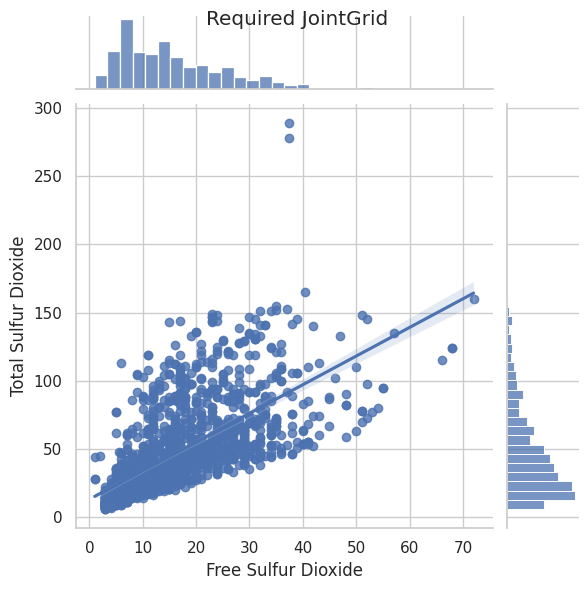

In [ ]:
sns.set(style="whitegrid")

g = sns.JointGrid(data=wine, x="free sulfur dioxide", y="total sulfur dioxide")

sns.regplot(data=wine, x="free sulfur dioxide", y="total sulfur dioxide", ax=g.ax_joint)
sns.histplot(data=wine, x="free sulfur dioxide", ax=g.ax_marg_x)
sns.histplot(data=wine, y="total sulfur dioxide", ax=g.ax_marg_y)

g.set_axis_labels("Free Sulfur Dioxide", "Total Sulfur Dioxide")
g.fig.suptitle("Required JointGrid")

## Ordinary Least Squares (OLS) Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Remember that statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables

### Q3: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [ ]:
model0 = smf.ols("Q('total sulfur dioxide') ~ Q('free sulfur dioxide')", data=wine).fit()
model0.summary()
#R squared can be a negative value
# Prob F-statistic is the p value (chance of this result if it were random data)
# Reject null hypothesis in favor of alternative hypothesis (value of p is less than .05)
# Coefficient R-squared is 0.446
# When free sulfur dioxide is 60,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('total sulfur dioxide')   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Thu, 28 Sep 2023   Prob (F-statistic):          6.40e-207
Time:                               19:49:03   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.1354      1.114     11.795      0.000      10.951      15.320
Q('free sulfur dioxide')     2.0997      0.059     35.840      0.000       1.985       2.215
==============================================================================
Omnibus:                      621.223   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.294
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fs= 60
ts = + 13.1354 + 2.0997 * fs
ts
# At a free sulfur dioxide of 60, Total sulfur dioxide should be near 139.1


139.1174

Insert your answer here.

Exercise: Putting our ideas together

Download the Szeged weather dataset from https://www.kaggle.com/datasets/budincsevity/szeged-weather

1. Create a regression model with "apparent temperature" as the dependent variable and "temperature" as the predictor variable.
Report the following:
    1. Coefficient of determination (i.e. $r^2$)
    2. Whether the regression is statistically significant
    3. An estimate for the value of "apparent temperature" when the value of "temperature" is 10.


2. Create a regression model with "apparent temperature" as the dependent variable and "temperature" and "humidity" as the predictor variables.
Report the following:
    1. Coefficient of determination (i.e. $r^2$)
    2. Whether the regression is statistically significant
    3. An estimate for the value of "apparent temperature" when the value of "temperature" is 10 and "humidity" is 0.5.

Use as many code and markdown cells as you need to answer the questions.

In [ ]:
wh = pd.read_csv('weatherHistory.csv')

In [ ]:
model0 = smf.ols("Q('Apparent Temperature (C)') ~ Q('Humidity') * Q('Humidity')", data = wh).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q('Apparent Temperature (C)')   R-squared:                       0.363
Model:                                       OLS   Adj. R-squared:                  0.363
Method:                            Least Squares   F-statistic:                 5.499e+04
Date:                           Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                                   19:49:03   Log-Likelihood:            -3.4369e+05
No. Observations:                          96453   AIC:                         6.874e+05
Df Residuals:                              96451   BIC:                         6.874e+05
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.0879      0.107    328.119      0.000      34.878      35.298
Q('Humidity')   -32.9745      0.141   -234.489      0.000     -33.250     -32.699
==============================================================================
Omnibus:                     3365.837   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3727.020
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                       3.144   Cond. No.                         7.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hypothesis testing (t-test and ANOVA)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

For this section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to
load them into a DataFrame:

In [ ]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv"

In [ ]:
biopics = pd.read_csv(url,encoding="latin1")

In [ ]:
biopics.head()
# Box office is in a nice human readable format but it's not an easy format to run calculations on.


,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that
converts representations like '$56.7M' to '56700000'.  How?

Time for some regular expressions (yay!):

## Q6: Fill in the regular expression


In [ ]:
import re
import numpy as np

# My approach does not use regular expressions. TO learn to use regex, visit regex101.
# My approach will not work because it does not account for the $ in front.

#def box_office_dollars(earnings):
#  if biopics['box_office'].str.contains('K'):
#    biopics['box_office'].str.split('K'[0]) + biopics.str.append('000')
#    biopics = biopics['box_office'].astype(int)
#    return biopics['box_office']


# Test out our function using assert statements
#assert(box_office_dollars("$1") == 1.0)
#assert(box_office_dollars("$537K") == 537000.0)
#assert(box_office_dollars("$1M") == 1000000.0)
#assert(np.isnan(box_office_dollars("-")))

In [ ]:
#Professor's example
import re
import numpy as np

def box_office_dollars(earnings):
    m = re.match(r'\$([0-9.]+)([KM]?)',earnings)
    if not m:
        return np.NaN
    ret = m.group(1)
    if not ret:
        return np.NaN
    try:
        ret = float(ret)
    except:
        return np.NaN
    if m.group(2) == 'M':
        return ret * 1_000_000
    if m.group(2) == 'K':
        return ret * 1_000
    return ret

# Test out our function using assert statements
assert(box_office_dollars("$1") == 1.0)
assert(box_office_dollars("$537K") == 537000.0)
assert(box_office_dollars("$1M") == 1000000.0)
assert(np.isnan(box_office_dollars("-"))) #  You cannot test equivalency of NaN values

And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [ ]:
biopics['box_office_dollars'] = biopics['box_office'].apply(box_office_dollars)

In [ ]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0


## Q7: What should we do with our missing values:

In [ ]:
biopics.dropna(subset = ['box_office_dollars'], inplace = True) # We don't want to drop ALL NAs, just the box office dollars column.
# A little dangerous because we're modifying biopics directly, so we'd have to reimport data from scratch if wrong.
biopics

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Wilde,http://www.imdb.com/title/tt0120514/,UK,1997,$2.16M,Brian Gilbert,1,Oscar Wilde,Author,Known,White,0,Male,Stephen Fry,2160000.0
744,Wilson,http://www.imdb.com/title/tt0037465/,US,1944,$2M,Henry King,1,Woodrow Wilson,World leader,Known,White,0,Male,Alexander Knox,2000000.0
746,Wired,http://www.imdb.com/title/tt0098660/,US,1989,$1.09M,Larry Peerce,1,John Belushi,Comedian,Unknown,NaN,0,Male,Michael Chiklis,1090000.0
748,Without Limits,http://www.imdb.com/title/tt0119934/,US,1998,$777K,Robert Towne,1,Steve Prefontaine,Athlete,Known,White,0,Male,Billy Crudup,777000.0


As always, let's take a look at the distribution of our variable:


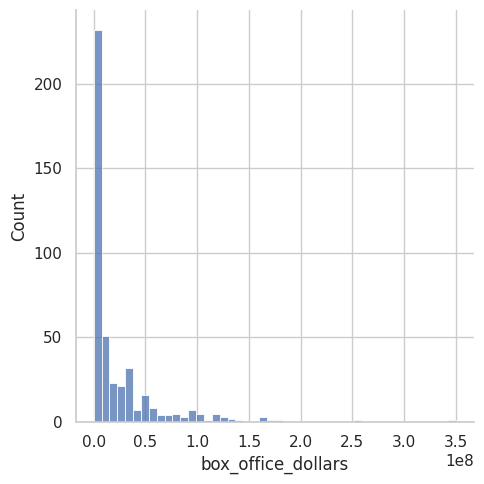

In [ ]:
sns.displot(biopics['box_office_dollars'])

Hmmmm.  That doesn't look good (why?) .

Let's see if we can make that look a bit more like a normal distribution.  Let's
apply a log transform:

In [ ]:
biopics['log_box_office_dollars'] = np.log(biopics['box_office_dollars'])
#take ln of all the revenues, since it's the exponent put on e to get the original number.
#Simply take log of each value and put it in a new column.

In [ ]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0,16.722412
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0,13.193753
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728


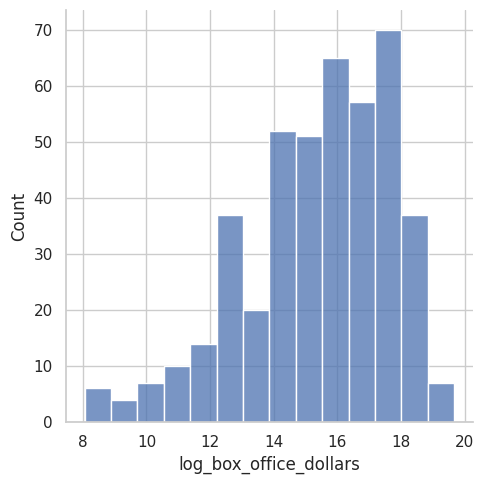

In [ ]:
sns.displot(biopics['log_box_office_dollars'])

## Q8a: Use a boxplot to look at the relationship of log(box_office_dollars) and whether the subject of the biopic was a person of color or not

<Axes: xlabel='person_of_color', ylabel='log_box_office_dollars'>

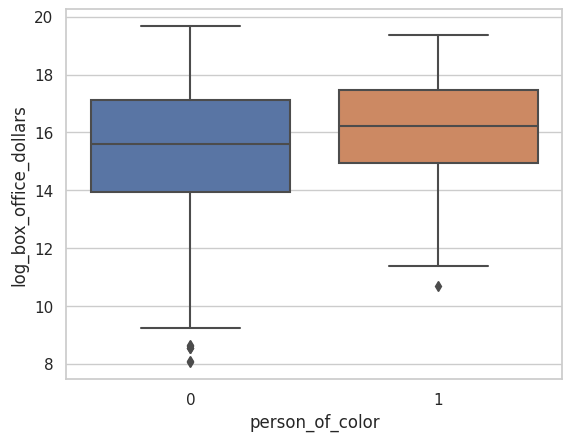

In [ ]:
sns.boxplot(biopics, x = 'person_of_color', y = 'log_box_office_dollars')

## Q8b: Does it look like there's a difference between the two groups?

It looks like there is a difference, but not a huge one.

## Q9: Conduct an ANOVA to determine if there are statistically significant differences between the two groups.

In [ ]:
model = ols('log_box_office_dollars ~ C(person_of_color)',biopics).fit()
model.summary()
#Whether it's statistically significant or not depends! That's why you need to know your P-value first.
# Set your alpha value before you conduct your test and STICK TO IT
# We set it at 0.05, so we see this as a statistically significant difference.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_box_office_dollars   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     4.127
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):             0.0428
Time:                            19:49:05   Log-Likelihood:                -984.42
No. Observations:                     437   AIC:                             1973.
Df Residuals:                         435   BIC:                             1981.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  15.2572      0.121    125.644      0.000      15.018      15.496
C(person_of_color)[T.1]     0.5915      0.291      2.031      0.043       0.019       1.164
==============================================================================
Omnibus:                       34.714   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.072
Skew:                          -0.745   Prob(JB):                     1.21e-09
Kurtosis:                       3.182   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insert your interpretation here.

## The t-test

To test of there's a statistically significant difference between two means, we
can use the independent sample t-test.  First, load up the right package:

In [ ]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [ ]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color" ] == 0]

In [ ]:
ttest_ind(poc["log_box_office_dollars"],not_poc["log_box_office_dollars"])
#Calculates probability of incorrectly predicting our null hypothesis

TtestResult(statistic=2.0314176362558167, pvalue=0.042820052741479, df=435.0)


## Q10: What does that mean?

Insert your interpretations here

## ANOVA
Ok, that's pretty straight-forward.  Let's look at a more complex problem:

In [ ]:
biopics.subject_race.value_counts().sort_index()

African                        7
African American              31
Asian                          4
Asian American                 3
Caribbean                      1
Hispanic (Latin American)     10
Hispanic (Latina)              1
Hispanic (Latino)              4
Hispanic (White)               4
Indian                         1
Mediterranean                  1
Middle Eastern                 5
Middle Eastern (White)         8
Multi racial                  17
Native American                2
White                        218
Name: subject_race, dtype: int64

<Axes: xlabel='subject_race', ylabel='log_box_office_dollars'>

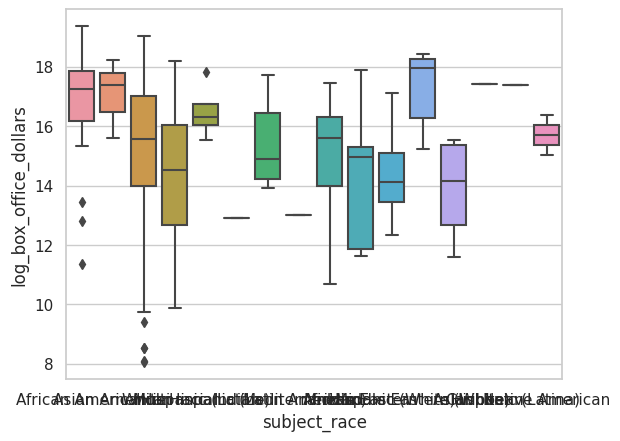

In [ ]:
sns.boxplot(x="subject_race",y="log_box_office_dollars",data=biopics)

Without getting too worred about the fact that the axes are unreadable, it looks like
there are some differences between the different groups.  But are they real?

Let's start with an ANOVA:

In [ ]:
box_office_dollars_lm = ols('log_box_office_dollars ~ subject_race', data=biopics).fit()
table = sm.stats.anova_lm(box_office_dollars_lm, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table
#The probability of getting that large of an F value is 0.0012.
#There are at least two groups that are different from each other, but we don't know in what direction.


,sum_sq,df,F,PR(>F)
subject_race,182.728250,15.0,2.566995,0.001263
Residual,1428.419809,301.0,NaN,NaN


In [ ]:
res = smf.ols('log_box_office_dollars ~ subject_race',biopics).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     2.567
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):            0.00126
Time:                            19:49:05   Log-Likelihood:                -688.41
No. Observations:                     317   AIC:                             1409.
Df Residuals:                         301   BIC:                             1469.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
biopics.groupby('subject_race')['log_box_office_dollars'].mean()

subject_race
African                      14.904044
African American             16.892411
Asian                        13.865348
Asian American               17.056599
Caribbean                    17.421008
Hispanic (Latin American)    15.357551
Hispanic (Latina)            17.382222
Hispanic (Latino)            16.484757
Hispanic (White)             14.412265
Indian                       12.899220
Mediterranean                13.008074
Middle Eastern               14.327012
Middle Eastern (White)       17.309801
Multi racial                 14.229736
Native American              15.689297
White                        15.213498
Name: log_box_office_dollars, dtype: float64

### Q11: Is there a statistically significant difference?

Yes. We know it's yes because of our P-value, which tells us that we can reject the null hypothesis and be wrong less than 5% of the time (alpha value)

(We would be wrong 1.2 out of 1000 times, which is low enough for us to be confident.)
There appears to be a statistically significant difference in log office dollars based on a subject's race.

Let's apply Tukey's HSD using the same model and see what we get.

### Q12: Write code to use Tukey's HSD test on the subject_race variable and interpret the results.

In [ ]:
#ANOVA tells us that groups differ, but not WHICH groups.
#We can use tukeyhsd to show those.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
biopics.dropna(subset = ['subject_race'], inplace = True)
res2 = pairwise_tukeyhsd(biopics['log_box_office_dollars'], biopics['subject_race'])
res2.summary()
#Look for values of True

group1,group2,meandiff,p-adj,lower,upper,reject
African,African American,1.9884,0.7096,-1.1616,5.1384,False
African,Asian,-1.0387,1.0,-5.7568,3.6794,False
African,Asian American,2.1526,0.9884,-3.0419,7.347,False
African,Caribbean,2.517,0.9995,-5.5302,10.5642,False
African,Hispanic (Latin American),0.4535,1.0,-3.2561,4.1631,False
African,Hispanic (Latina),2.4782,0.9996,-5.569,10.5254,False
African,Hispanic (Latino),1.5807,0.9988,-3.1374,6.2988,False
African,Hispanic (White),-0.4918,1.0,-5.2099,4.2263,False
African,Indian,-2.0048,1.0,-10.052,6.0424,False
African,Mediterranean,-1.896,1.0,-9.9432,6.1512,False


Interpret your results

### Exercise: Putting our ideas together

Download the chocolate bars rating dataset from https://www.kaggle.com/rtatman/chocolate-bar-ratings.

Use the data to answer the following questions:
1. Is there a statistically significant difference in the average rating of chocolate bars from different countries (use the country of manufacture)?  If yes, which countries are different from each other?
2. Explore other variables in the dataset.  Is there anything else interesting you can find?

Use as many code and markdown cells as you need to answer the questions.

ParserError: ignored

# <font color="green">END OF NOTEBOOK</font>
## Remember to submit HTML and IPYNB files via Canvas.

In [ ]:
# Ignore, these are my personal instructions for html conversion.
# Format as: !jupyter nbconvert /content/mynotebook.ipynb --to html
# To use, download and re-upload  ipnyb to make it a file on Colab
# Then, uncomment and run the cell below. Download and submit the HTML.
!jupyter nbconvert '/content/SI_618_Day_05_Applied_Statistics_Inclass.ipynb' --to html

[NbConvertApp] Converting notebook /content/SI_618_Day_05_Applied_Statistics_Inclass.ipynb to html
[NbConvertApp] Writing 959235 bytes to /content/SI_618_Day_05_Applied_Statistics_Inclass.html
